# Intro to Time Series Analysis

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [4]:
#Generate example time series data
np.random.seed(1663)
dates = pd.date_range(start='1990-01-01', periods=100, freq='M') #Make a column of dates
dates = pd.to_datetime(dates) #Tell Pandas to treat the column as a datetime object
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({'Date': dates, 'Value': values})
df.set_index('Date', inplace=True) 

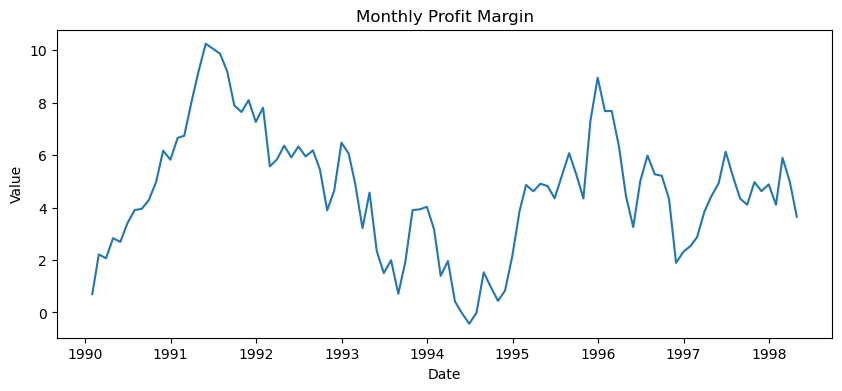

In [9]:
#Plot the time series data
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value'])
plt.title('Monthly Profit Margin')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

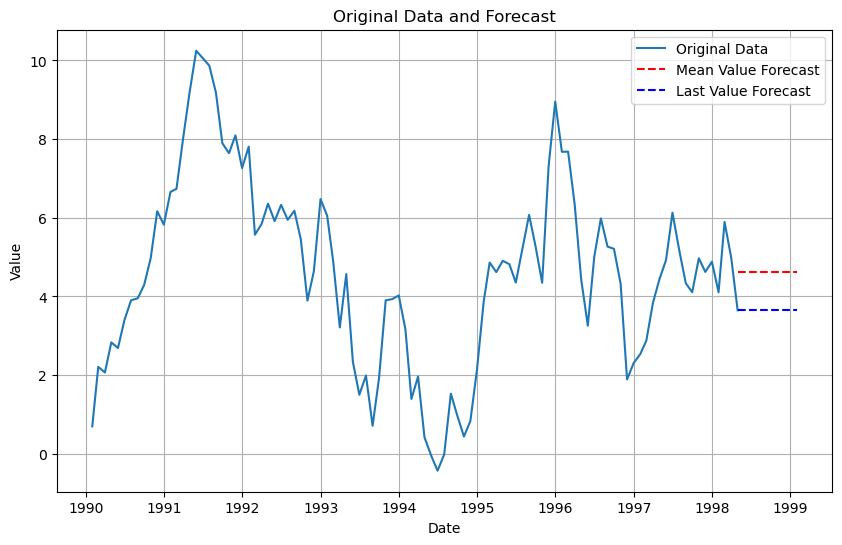

In [10]:
#Simple Forecasting Methods
mean_forecast = [df['Value'].mean()] * 10
last_value_forecast = [df['Value'].iloc[-1]] * 10

#n = len(df)
#drift = (df['Value'].iloc[-1] - df['Value'].iloc[0]) / n
#drift_forecast = [df['Value'].iloc[-1] + drift * i for i in range(1, 11)]

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='M'), mean_forecast, color='red', linestyle='--', label='Mean Value Forecast')
plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='M'), last_value_forecast, color='blue', linestyle='--', label='Last Value Forecast')
#plt.plot(pd.date_range(start=df.index[-1], periods=10, freq='M'), drift_forecast, color='purple', linestyle='--', label='Drift Forecast')

plt.title('Original Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Value')

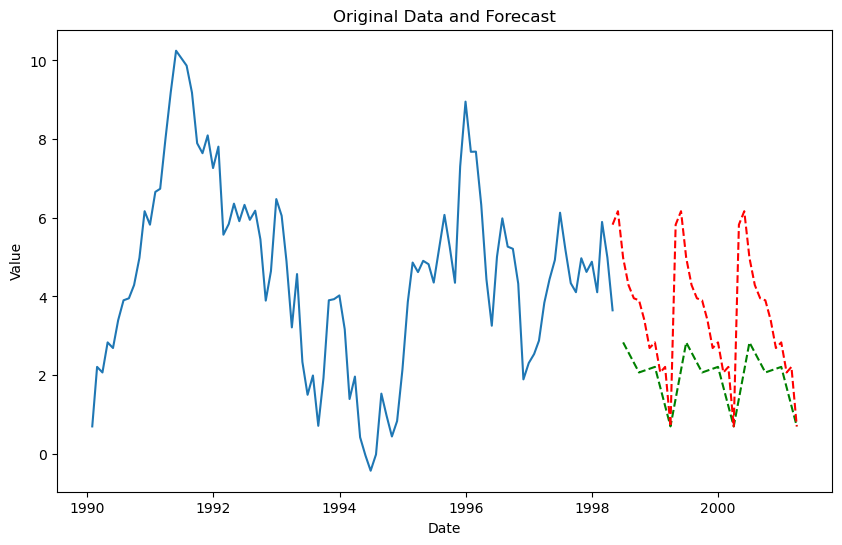

In [11]:
seasonal_naive_forecast_q = []
for i in range(12):
    prev_season_value_q = df['Value'].iloc[-(i + 1) % 4]  #Get the value from the same quarter of the previous year
    seasonal_naive_forecast_q.append(prev_season_value_q)

seasonal_naive_forecast_m = []
for i in range(36):
    prev_season_value_m = df['Value'].iloc[-(i + 1) % 12]  #Get the value from the same month of the previous year
    seasonal_naive_forecast_m.append(prev_season_value_m)


plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=12, freq='Q'), seasonal_naive_forecast_q, color='green', linestyle='--', label='Seasonal Naive Forecast - Quarterly')
plt.plot(pd.date_range(start=df.index[-1], periods=36, freq='M'), seasonal_naive_forecast_m, color='red', linestyle='--', label='Seasonal Naive Forecast - Monthly')

plt.title('Original Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

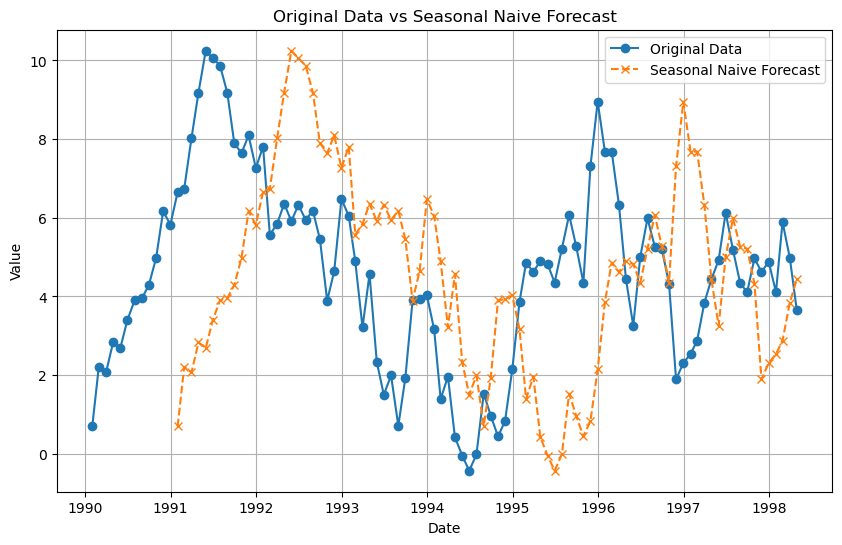

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Seasonality period (e.g., 12 for monthly data with yearly seasonality)
seasonality = 12

# Shift the data by the seasonality period to create the forecast
df['seasonal_naive_forecast'] = df['Value'].shift(seasonality)

# Plotting the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data', marker='o', linestyle='-')
plt.plot(df.index, df['seasonal_naive_forecast'], label='Seasonal Naive Forecast', marker='x', linestyle='--')

plt.title('Original Data vs Seasonal Naive Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Text(0, 0.5, 'Value')

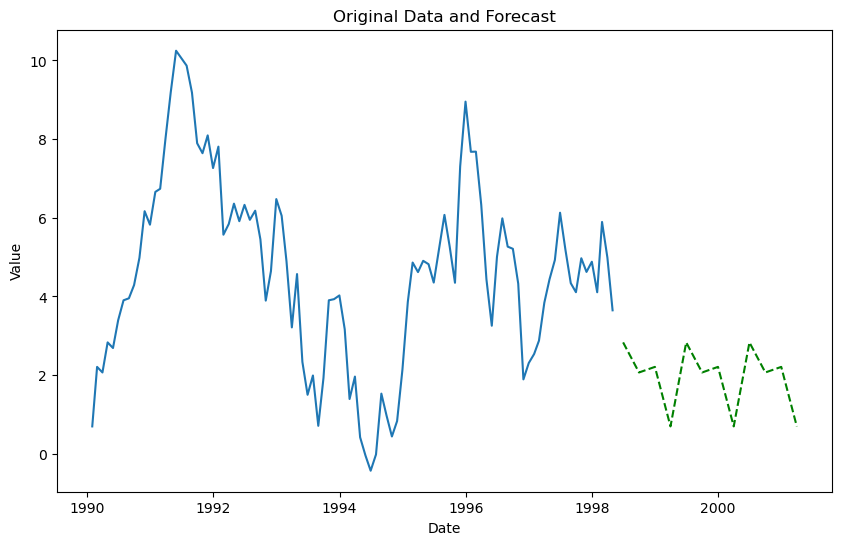

In [13]:
seasonal_naive_forecast_q = []
for i in range(12):
    prev_season_value_q = df['Value'].iloc[-(i + 1) % 4]  #Get the value from the same quarter of the previous year
    seasonal_naive_forecast_q.append(prev_season_value_q)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(pd.date_range(start=df.index[-1], periods=12, freq='Q'), seasonal_naive_forecast_q, color='green', linestyle='--', label='Seasonal Naive Forecast - Quarterly')

plt.title('Original Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Value')

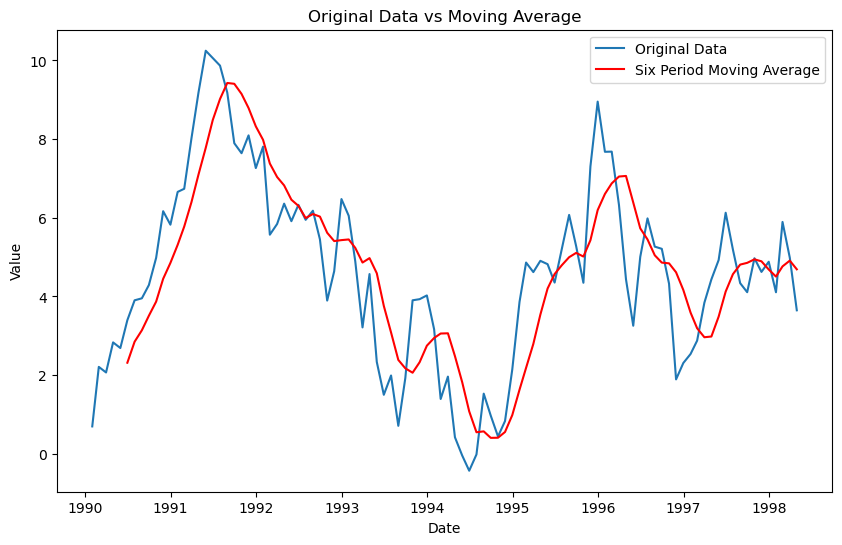

In [14]:
#Calculate a 6 period moving average
window_size = 6
df['Moving_Avg_6'] = df['Value'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['Moving_Avg_6'], color='red', label='Six Period Moving Average')
plt.title('Original Data vs Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

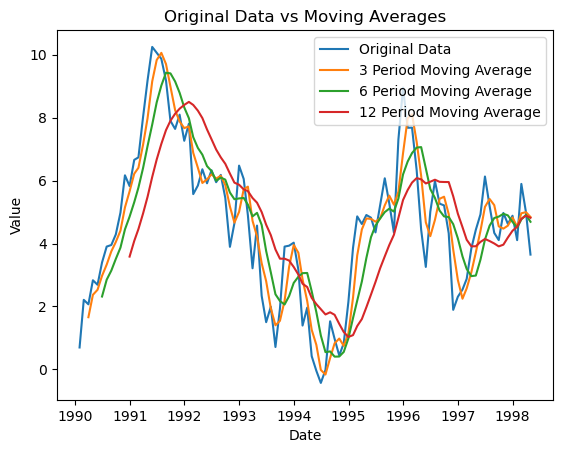

In [43]:
window_sizes = [3,6,12]

plt.plot(df.index, df['Value'], label='Original Data')

for i in window_sizes:
    df['Moving_Avg_' + str(i)] = df['Value'].rolling(window=i).mean()
    plt.plot(df.index, df['Moving_Avg_' + str(i)], label=f'{i} Period Moving Average')

# Finalize the plot
plt.title('Original Data vs Moving Averages')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

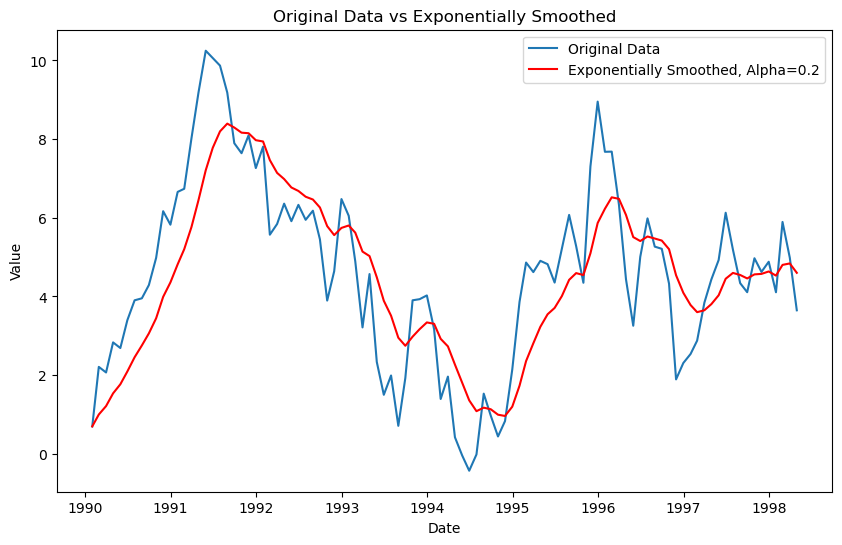

In [16]:
#Exponential Smoothing w/ Pandas
alpha = 0.2  #Smoothing factor
df['Exponential_Smoothed'] = df['Value'].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['Exponential_Smoothed'], color='red', label='Exponentially Smoothed, Alpha=0.2')
plt.title('Original Data vs Exponentially Smoothed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

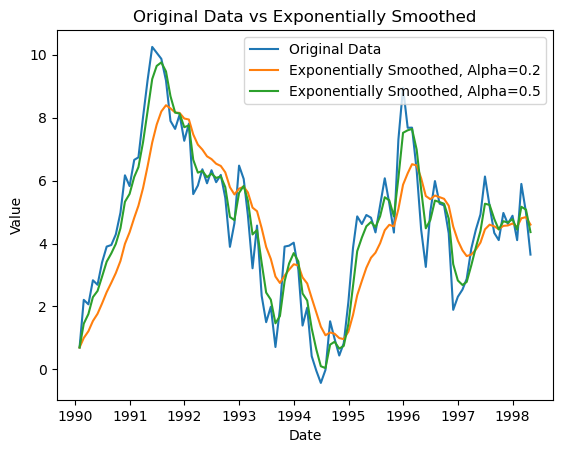

In [47]:
#Exponential Smoothing w/ Pandas
plt.plot(df.index, df['Value'], label='Original Data')
alphas = [0.2,0.5]  #Smoothing factor

for i in alphas:
    df['Exponential_Smoothed'] = df['Value'].ewm(alpha=i, adjust=False).mean()
    plt.plot(df.index, df['Exponential_Smoothed'], label=f'Exponentially Smoothed, Alpha={i}')

plt.title('Original Data vs Exponentially Smoothed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


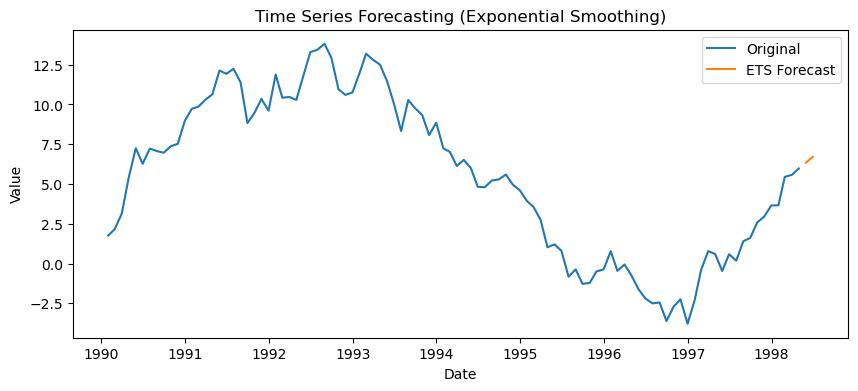

In [33]:
#Exponential Smoothing w/ Statsmodels 
model_ets = sm.tsa.ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=4)
results_ets = model_ets.fit()
forecast_ets = results_ets.predict(start=100, end=101)

#Plot the original data and the exponential smoothing forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast_ets, label='ETS Forecast')
plt.title('Time Series Forecasting (Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

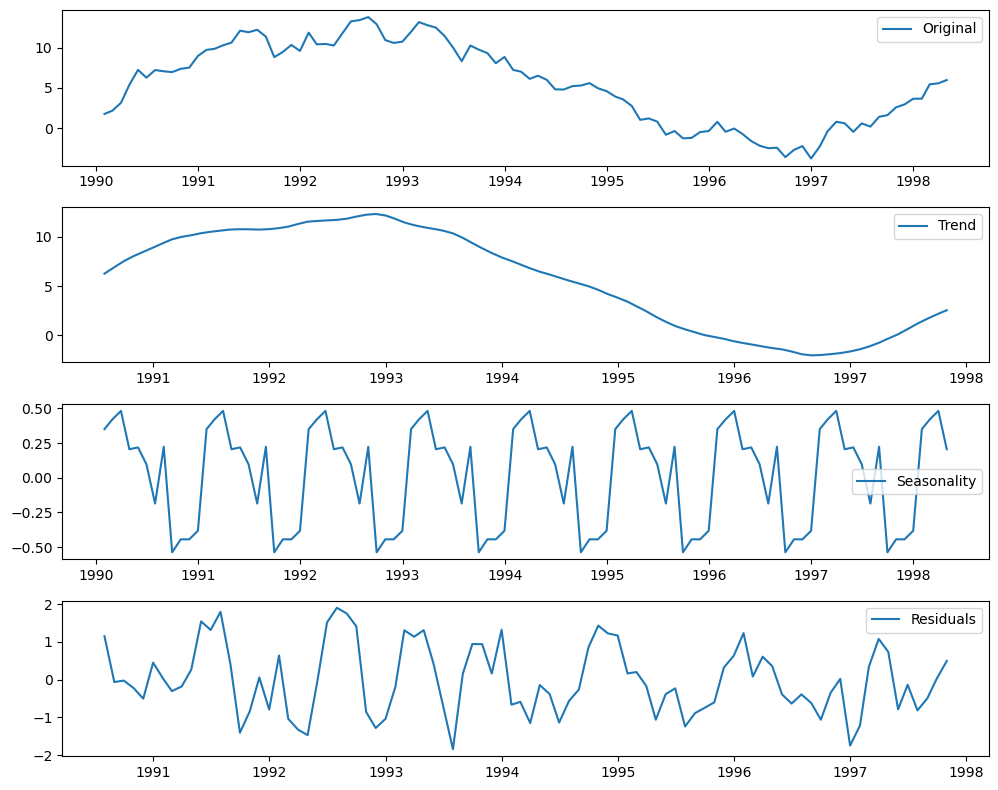

In [158]:
#Decompose the time series into trend, seasonality, and residual components
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive') #Or model = multiplicative
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Value'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [73]:
#Augmented Dickey Fuller test for stationarity 
#H0: Time series contains a unit root and is non-stationary, HA: Time series does not contain a unit root and is stationary
#If adf_stat < adf_cv, reject the null / If p-value < alpha, reject the null
adf_result = adfuller(values)
adf_stat = adf_result[0]
adf_p_value = adf_result[1]
five_pct_cv = adf_result[4].get('5%') #adf_result[4] is a dictionary of alpha and cv


if adf_p_value < 0.05:
    print('Reject the Null - The data are probably stationary')
else:
    print('Do not reject the null - The data are probably not stationary.')
    
if adf_stat < five_pct_cv:
    print('Reject the null - The data are probably stationary')
else:
    print('Do not reject the null - The data are probably not stationary.')
    
    
def adf_test(values, alpha):
    adf_result = adfuller(values)
    adf_p_value = adf_result[1]
    
    if adf_p_value < alpha:
        print('Reject the Null - The data are probably stationary')
    elif adf_p_value > alpha:
        print('Do not reject the null - The data are probably not stationary.')   

Do not reject the null - The data are probably not stationary.
Do not reject the null - The data are probably not stationary.


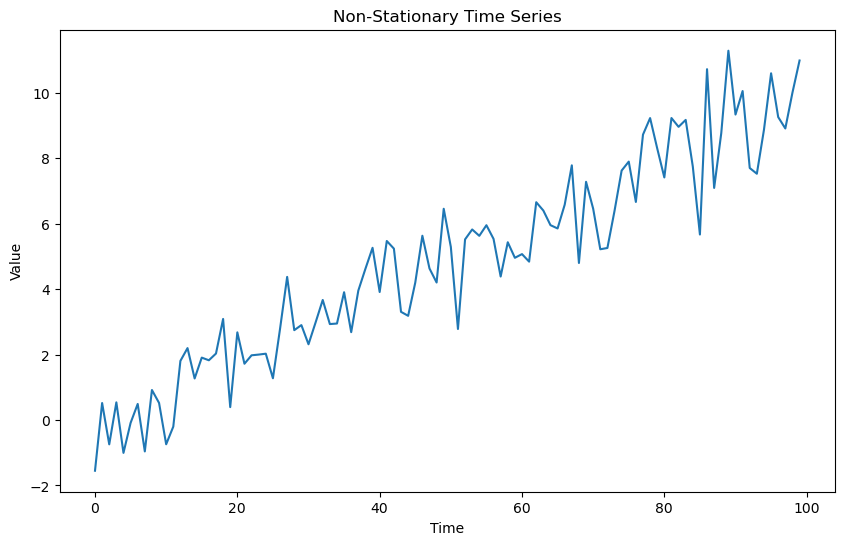

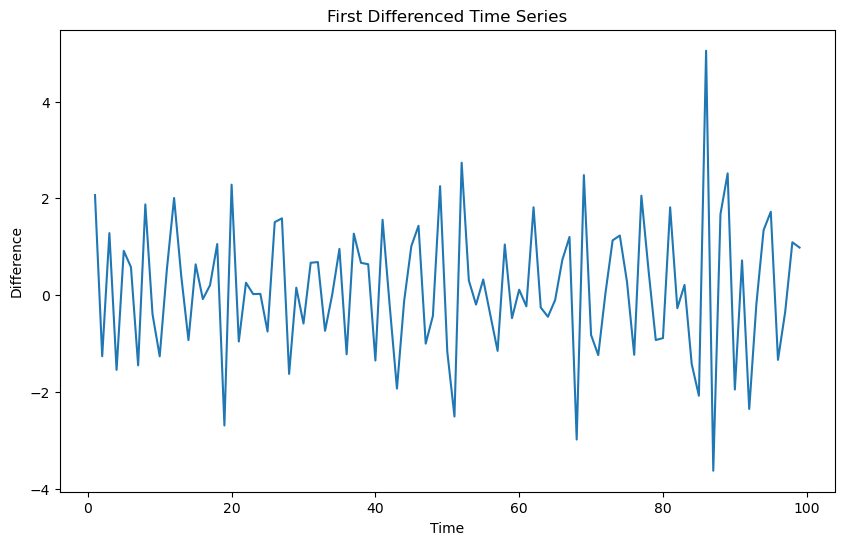

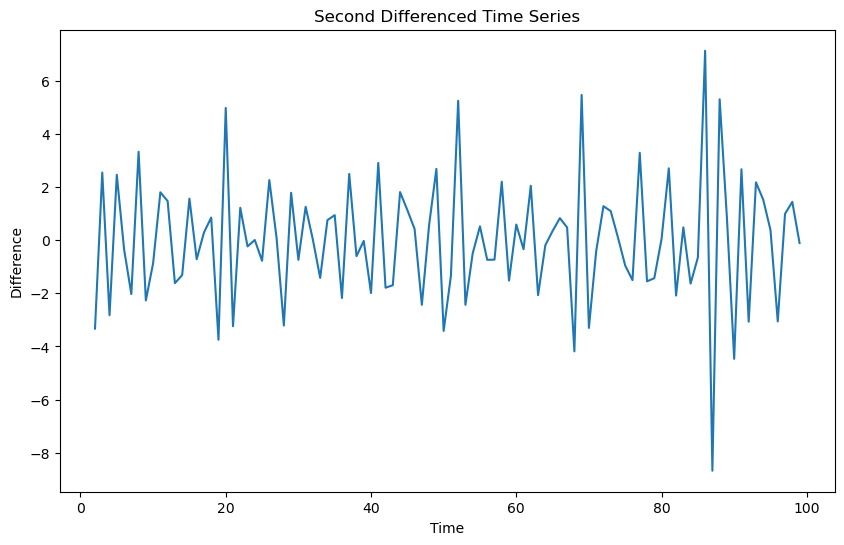

In [84]:
#Differencing
#Generate non-stationary time series
time = np.arange(0, 100, 1)
trend = 0.1 * time
noise = np.random.randn(len(time))
non_stationary_data = trend + noise

#Plot the non-stationary data
plt.figure(figsize=(10, 6))
plt.plot(time, non_stationary_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Non-Stationary Time Series')
plt.show()

#Calculate and plot the first differenced series
differenced_data = np.diff(non_stationary_data)
plt.figure(figsize=(10, 6))
plt.plot(time[1:], differenced_data) #Since one less value post-differencing
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('First Differenced Time Series')
plt.show()

#Calculate and plot the second differenced series
differenced_data_2 = np.diff(differenced_data)
plt.figure(figsize=(10, 6))
plt.plot(time[2:], differenced_data_2) #Since one less value post-differencing
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Second Differenced Time Series')
plt.show()

In [85]:
adf_test(non_stationary_data, 0.05)
adf_test(differenced_data, 0.05)

Do not reject the null - The data are probably not stationary.
Reject the Null - The data are probably stationary


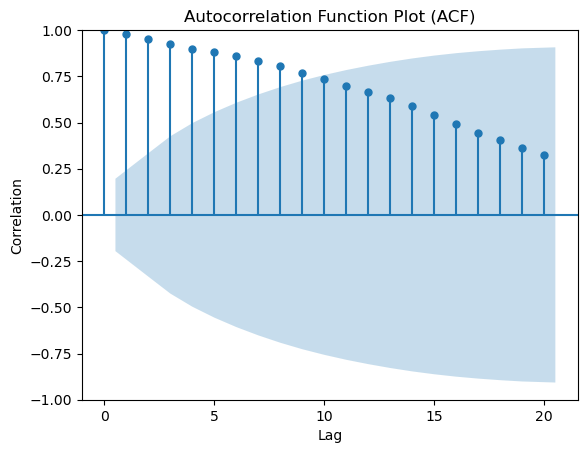

In [76]:
#ACF Plot
sm.graphics.tsa.plot_acf(df['Value'].values)
#sm.graphics.tsa.plot_acf(df['Value'].values, lags=30)
plt.title('Autocorrelation Function Plot (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

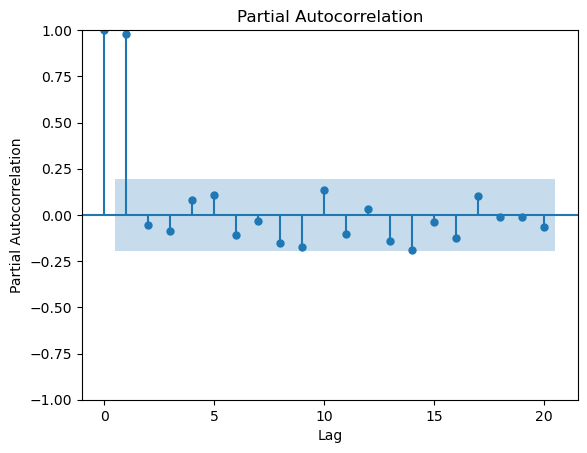

In [77]:
#PACF Plot
sm.graphics.tsa.plot_pacf(df['Value'].values)
#sm.graphics.tsa.plot_pacf(df['Value'].values, lags=30)
plt.title('Partial Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

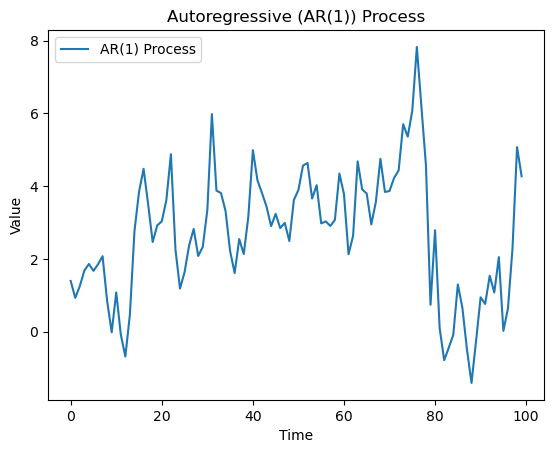

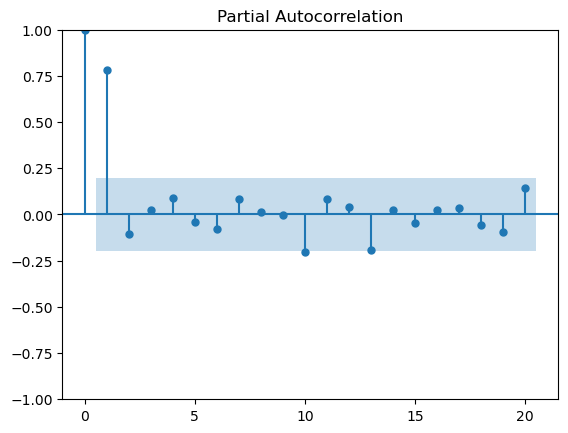

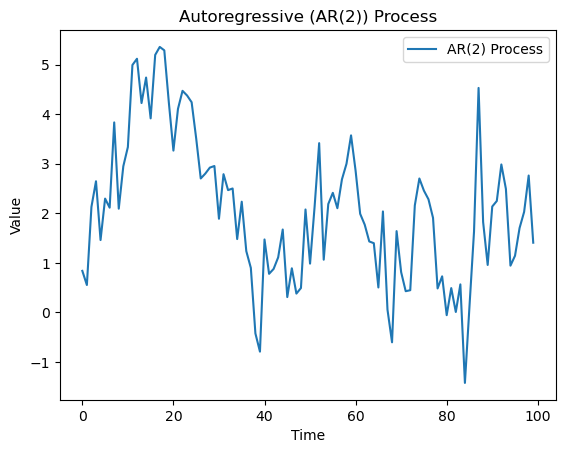

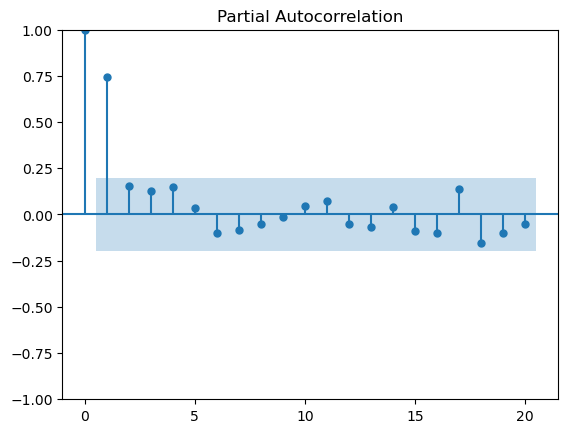

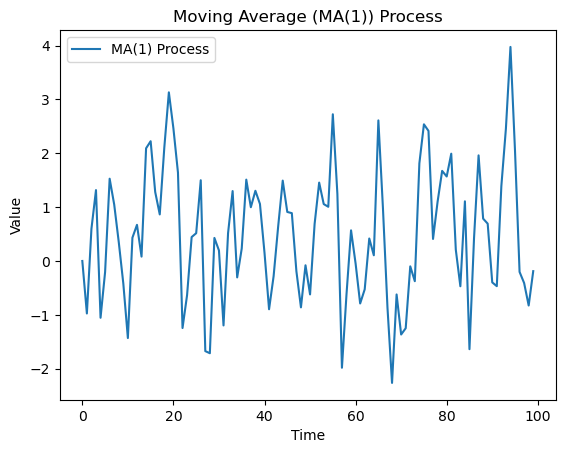

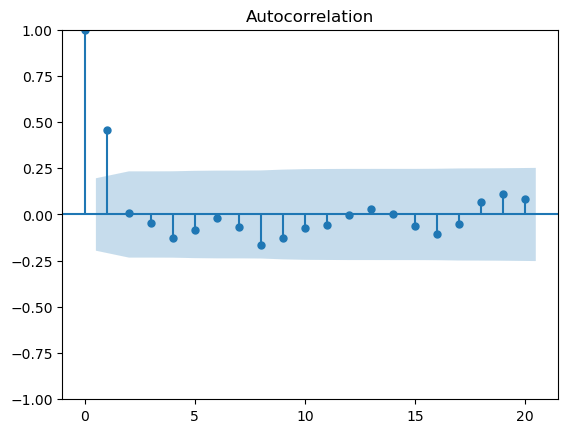

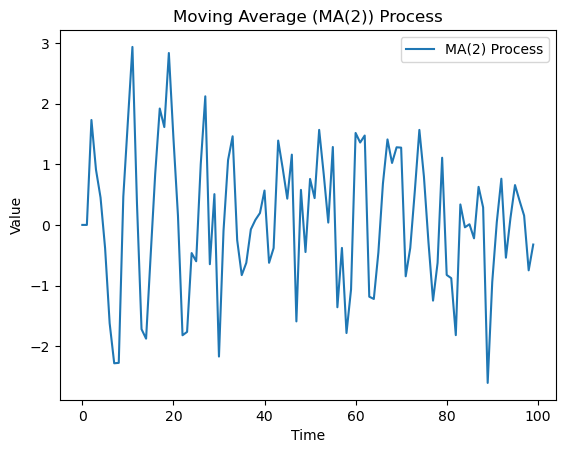

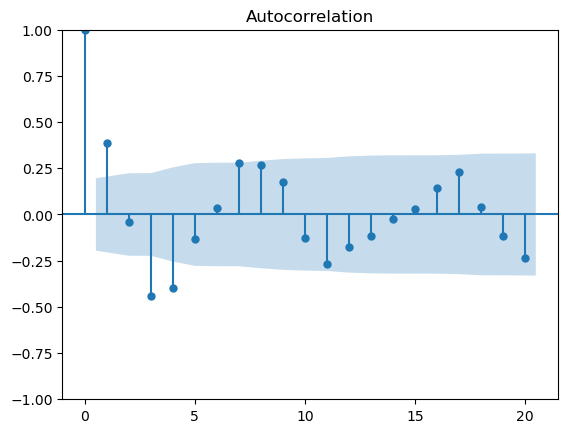

In [160]:
df = pd.read_csv('ARandMA.csv')
df.head()

Y_AR_1 = df['AR1']
Y_AR_2 = df['AR2']
Y_MA_1 = df['MA1']
Y_MA_2 = df['MA2']

plt.plot(Y_AR_1, label='AR(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive (AR(1)) Process')
plt.legend()
plt.show()

sm.graphics.tsa.plot_pacf(Y_AR_1)
plt.show()

plt.plot(Y_AR_2, label='AR(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive (AR(2)) Process')
plt.legend()
plt.show()

sm.graphics.tsa.plot_pacf(Y_AR_2)
plt.show()

plt.plot(Y_MA_1, label='MA(1) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Moving Average (MA(1)) Process')
plt.legend()
plt.show()

sm.graphics.tsa.plot_acf(Y_MA_1)
plt.show()

plt.plot(Y_MA_2, label='MA(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Moving Average (MA(2)) Process')
plt.legend()
plt.show()

sm.graphics.tsa.plot_acf(Y_MA_2)
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                    AR1   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -148.026
Method:               Conditional MLE   S.D. of innovations              1.079
Date:                Fri, 22 Mar 2024   AIC                            302.052
Time:                        15:36:45   BIC                            309.837
Sample:                             1   HQIC                           305.202
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5885      0.198      2.979      0.003       0.201       0.976
AR1.L1         0.7909      0.062     12.814      0.000       0.670       0.912
                                    Roots           

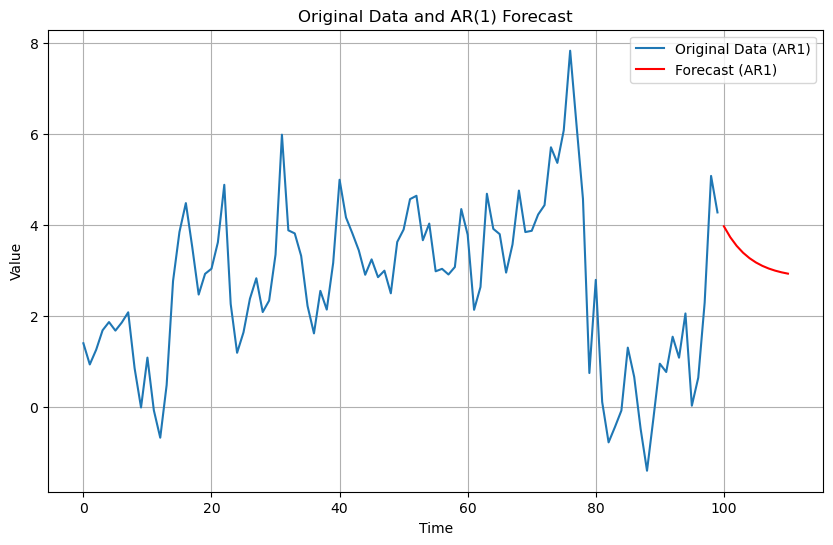

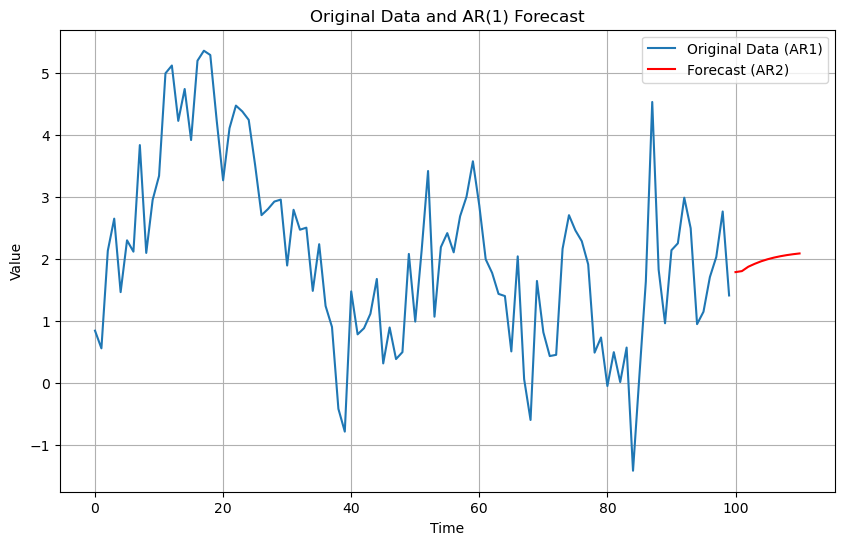

In [116]:
#AR1 model 
AR_1_Model = AutoReg(Y_AR_1, lags=1)
AR_1_Results = ar1_model.fit()
print(AR_1_Results.summary())
Forecast_AR_1 = AR_1_Results.predict(start=len(Yar1), end=len(Yar1) + 10)

plt.figure(figsize=(10, 6))
plt.plot(Y_AR_1, label='Original Data (AR1)')
plt.plot(np.arange(len(Y_AR_1), len(Y_AR_1) + len(Forecast_AR_1)), Forecast_AR_1, color='red', label='Forecast (AR1)')
plt.title('Original Data and AR(1) Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#AR2 model
AR_2_Model = AutoReg(Y_AR_2, lags=2)
AR_2_Results = AR_2_Model.fit()
AR_2_Results.summary()
Forecast_AR_2 = AR_2_Results.predict(start=len(Y_AR_2), end=len(Y_AR_2) + 10)

plt.figure(figsize=(10, 6))
plt.plot(Y_AR_2, label='Original Data (AR1)')
plt.plot(np.arange(len(Y_AR_2), len(Y_AR_2) + len(Forecast_AR_2)), Forecast_AR_2, color='red', label='Forecast (AR2)')
plt.title('Original Data and AR(1) Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                    MA1   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -145.654
Date:                Fri, 22 Mar 2024   AIC                            297.309
Time:                        15:43:17   BIC                            305.124
Sample:                             0   HQIC                           300.472
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4819      0.172      2.802      0.005       0.145       0.819
ma.L1          0.6422      0.091      7.092      0.000       0.465       0.820
sigma2         1.0724      0.142      7.527      0.0

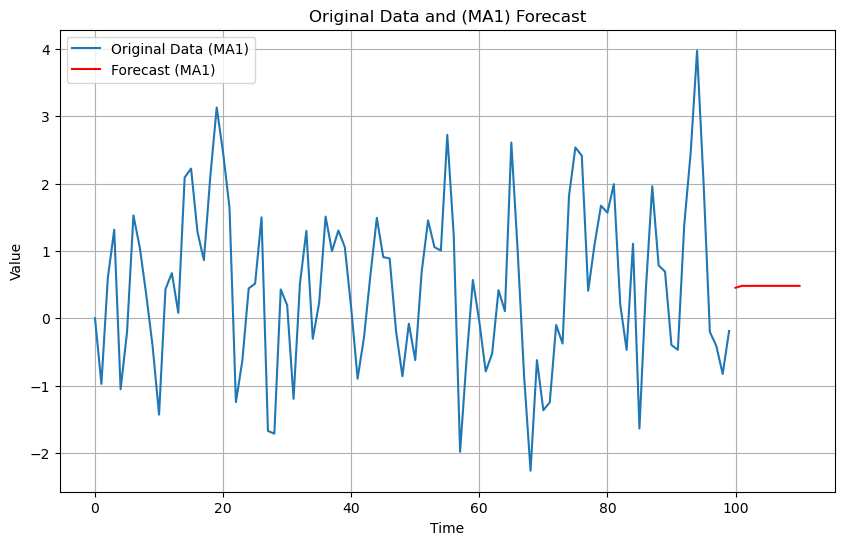

100   -0.215086
101    0.070577
102    0.076249
103    0.076249
104    0.076249
105    0.076249
Name: predicted_mean, dtype: float64


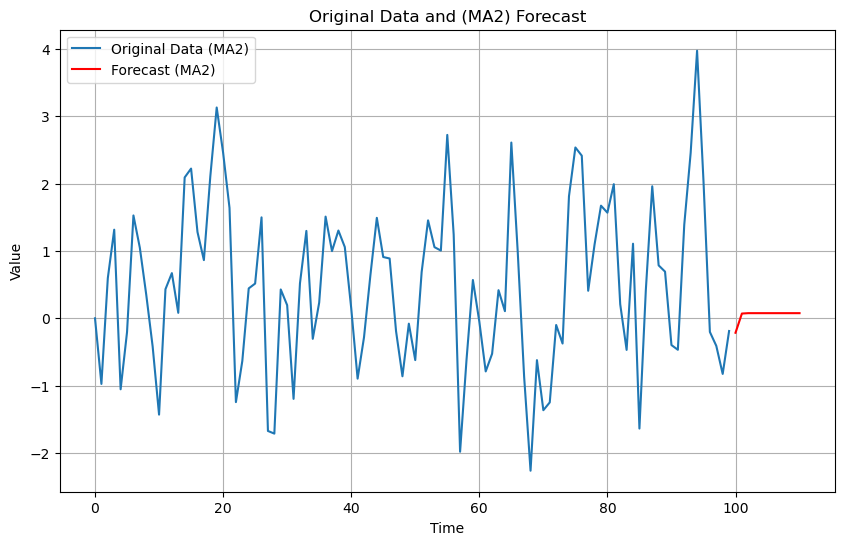

In [130]:
#MA1 Model
MA_1_Model = ARIMA(Y_MA_1, order=(0, 0, 1))
MA_1_Results = MA_1_Model.fit()
print(MA_1_Results.summary())
Forecast_MA_1 = MA_1_Results.predict(start=len(Y_MA_1), end=len(Y_MA_1) + 10)
print(forecast)

plt.figure(figsize=(10, 6))
plt.plot(Y_MA_1, label='Original Data (MA1)')
plt.plot(np.arange(len(Y_MA_1), len(Y_MA_1) + len(Forecast_MA_1)), Forecast_MA_1, color='red', label='Forecast (MA1)')
plt.title('Original Data and (MA1) Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

#MA2 Model
MA_2_Model = ARIMA(Y_MA_2, order=(0, 0, 2))
MA_2_Results = MA_2_Model.fit()
MA_2_Results.summary()
Forecast_MA_2 = MA_2_Results.predict(start=len(Y_MA_2), end=len(Y_MA_2) + 10)
print(forecast)

plt.figure(figsize=(10, 6))
plt.plot(Y_MA_1, label='Original Data (MA2)')
plt.plot(np.arange(len(Y_MA_2), len(Y_MA_2) + len(Forecast_MA_2)), Forecast_MA_2, color='red', label='Forecast (MA2)')
plt.title('Original Data and (MA2) Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No f

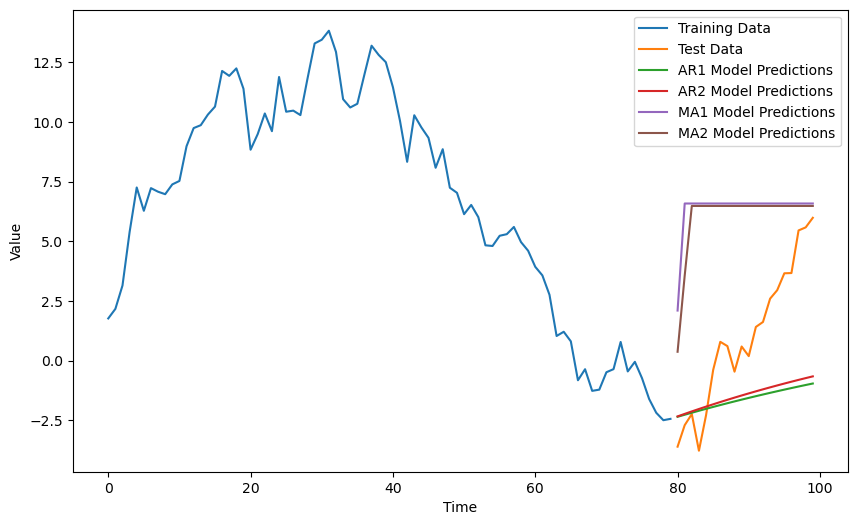

In [166]:
data = df['Value']

#Split the data into training and testing sets
train_size = int(0.8 * n)
train_data = data[:train_size]
test_data = data[train_size:]

#Fit the AR1 model to the training data
order = (1, 0, 0)  #ARIMA(p, d, q) 
ar1_model = ARIMA(train_data, order=order)
ar1_model_results = ar1_model.fit()

#Fit the AR2 model to the training data
order = (2, 0, 0)  #ARIMA(p, d, q) 
ar2_model = ARIMA(train_data, order=order)
ar2_model_results = ar2_model.fit()

#Fit the MA1 model to the training data
order = (0, 0, 1)  # ARIMA(p, d, q) order
ma1_model = ARIMA(train_data, order=order)
ma1_model_results = ma1_model.fit()

#Fit the MA2 model to the training data
order = (0, 0, 2)  # ARIMA(p, d, q) order
ma2_model = ARIMA(train_data, order=order)
ma2_model_results = ma2_model.fit()

#Make predictions on the test data
ar1_predictions = ar1_model_results.predict(start=train_size, end=n-1)
ar2_predictions = ar2_model_results.predict(start=train_size, end=n-1)
ma1_predictions = ma1_model_results.predict(start=train_size, end=n-1)
ma2_predictions = ma2_model_results.predict(start=train_size, end=n-1)


#Plot the original data and predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(train_size), train_data, label='Training Data')
plt.plot(range(train_size, n), test_data, label='Test Data')
plt.plot(range(train_size, n), ar1_predictions, label='AR1 Model Predictions')
plt.plot(range(train_size, n), ar2_predictions, label='AR2 Model Predictions')
plt.plot(range(train_size, n), ma1_predictions, label='MA1 Model Predictions')
plt.plot(range(train_size, n), ma2_predictions, label='MA2 Model Predictions')


plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -183.014
Date:                Wed, 03 Apr 2024   AIC                            372.027
Time:                        10:43:58   BIC                            379.843
Sample:                    01-31-1990   HQIC                           375.191
                         - 04-30-1998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5894      0.266     17.228      0.000       4.067       5.112
ma.L1          0.8156      0.070     11.691      0.000       0.679       0.952
sigma2         2.2511      0.335      6.713      0.0

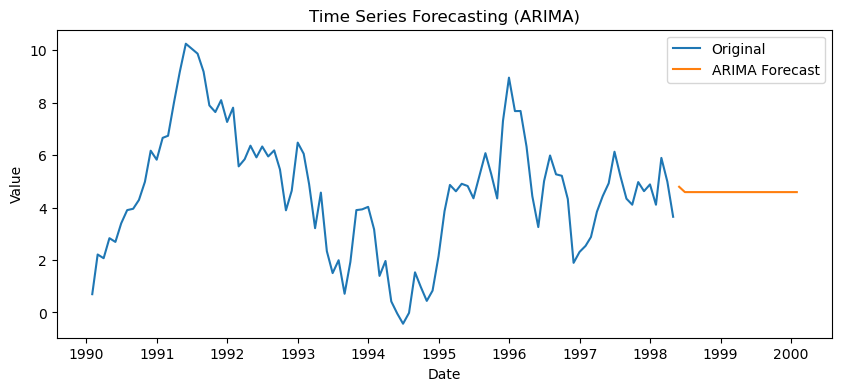

In [6]:
#Perform time series forecasting using ARIMA model
model = sm.tsa.ARIMA(df['Value'], order=(0, 0, 1))
results = model.fit()
print(results.summary())
forecast = results.predict(start=100, end=120)

#Plot the original data and the forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast, label='ARIMA Forecast')
plt.title('Time Series Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [20]:
#Auto ARIMA Model Selection
import pmdarima as pm
model = pm.auto_arima(df['Value'], seasonal=False, m=12, trace=True)

/Users/robertwrobel/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=302.007, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=614.881, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=298.480, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=499.907, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=299.519, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=299.282, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=300.128, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=296.038, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=459.958, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=296.195, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=295.917, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=372.027, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=297.149, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=297.530, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=341.3

In [ ]:
model = sm.tsa.ARIMA(df['Value'], order=(1, 0, 1))
results = model.fit()
print(results.summary())
forecast = results.predict(start=100, end=120)

#Plot the original data and the forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast, label='ARIMA Forecast')
plt.title('Time Series Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

In [41]:
#Perform time series forecasting using SARIMA model
model_sarima = sm.tsa.SARIMAX(df['Value'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model_sarima.fit()
forecast = results.predict(start=100, end=120)

#Plot the original data and the SARIMA forecasted values
plt.figure(figsize=(10, 4))
plt.plot(df['Value'], label='Original')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('Time Series Forecasting (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

KeyError: 'Value'

In [53]:
df = pd.read_csv('../data/SalesData.csv')
y = df['TotalSales']
X = df[['LocalUE','Confidence']]

model = ARIMA(y, order=(1,1,1), exog=X)
results = model.fit()
results.summary()
forecast = results.predict(start=100, end=120)
forecast

100    151.584151
101    136.508478
102    157.694622
103    156.007688
104    183.350128
105    147.138243
106    179.686279
107    176.247136
108    149.635298
109    136.647283
110    131.082943
111    116.156812
112    119.875712
113    114.533739
114    102.185685
115    100.168420
116    110.765699
117    112.441799
118    120.033948
119    125.767179
120    130.062931
Name: predicted_mean, dtype: float64

In [85]:
#Resampling
date_range = pd.date_range(start='2024-01-01', end='2027-12-31', freq='D')
sales_data = np.random.randint(1, 100, size=len(date_range))
df = pd.DataFrame(data={'Sales': sales_data}, index=date_range)

#Downsampling - Converting daily data into monthly data
monthly_sales = df.resample('M').sum()
yearly_sales = df.resample('Y').sum()
#print(monthly_sales)
#print(yearly_sales)

#Upsampling - Converting yearly data into weekly data
weekly_sales = yearly_sales.resample('M').asfreq()
print(weekly_sales)

#Interpolating - Filling in missing values
interpolated_weekly_sales = weekly_sales.interpolate(method='linear')
print(interpolated_weekly_sales)

              Sales
2024-12-31  18235.0
2025-01-31      NaN
2025-02-28      NaN
2025-03-31      NaN
2025-04-30      NaN
2025-05-31      NaN
2025-06-30      NaN
2025-07-31      NaN
2025-08-31      NaN
2025-09-30      NaN
2025-10-31      NaN
2025-11-30      NaN
2025-12-31  17577.0
2026-01-31      NaN
2026-02-28      NaN
2026-03-31      NaN
2026-04-30      NaN
2026-05-31      NaN
2026-06-30      NaN
2026-07-31      NaN
2026-08-31      NaN
2026-09-30      NaN
2026-10-31      NaN
2026-11-30      NaN
2026-12-31  18755.0
2027-01-31      NaN
2027-02-28      NaN
2027-03-31      NaN
2027-04-30      NaN
2027-05-31      NaN
2027-06-30      NaN
2027-07-31      NaN
2027-08-31      NaN
2027-09-30      NaN
2027-10-31      NaN
2027-11-30      NaN
2027-12-31  17514.0
                   Sales
2024-12-31  18235.000000
2025-01-31  18180.166667
2025-02-28  18125.333333
2025-03-31  18070.500000
2025-04-30  18015.666667
2025-05-31  17960.833333
2025-06-30  17906.000000
2025-07-31  17851.166667
2025-08-31  177

In [97]:
#Interpolation of Missing Values

dates = pd.date_range('2024-01-01', periods=20, freq='D')
data = np.random.randn(20)
data[4:8] = np.nan  
df = pd.DataFrame(data={'Value': data}, index=dates)
print(df)

#Linear
linear_interpolated = df.interpolate(method='linear')
print(linear_interpolated)

dates = pd.date_range('2024-01-01', periods=20, freq='D')
data = np.random.randn(20)
data[4:8] = np.nan  
df = pd.DataFrame(data={'Value': data}, index=dates)

#Forward - Last value before NaN used 
forward_interpolated = df.fillna(method='pad')
print(forward_interpolated)

dates = pd.date_range('2024-01-01', periods=20, freq='D')
data = np.random.randn(20)
data[4:8] = np.nan  
df = pd.DataFrame(data={'Value': data}, index=dates)

#Backward - First value after NaN used
backward_interpolated = df.fillna(method='bfill')
print(backward_interpolated)

dates = pd.date_range('2024-01-01', periods=20, freq='D')
data = np.random.randn(20)
data[4:8] = np.nan  
df = pd.DataFrame(data={'Value': data}, index=dates)

time_interpolated = df.interpolate(method='time')
print(time_interpolated)

dates = pd.date_range('2024-01-01', periods=20, freq='D')
data = np.random.randn(20)
data[4:8] = np.nan  
df = pd.DataFrame(data={'Value': data}, index=dates)

#Polynomial interpolation (2nd degree)
polynomial_interpolated = df.interpolate(method='polynomial', order=2)
print(polynomial_interpolated)

               Value
2024-01-01 -1.771897
2024-01-02  0.636870
2024-01-03 -0.671015
2024-01-04 -1.095839
2024-01-05       NaN
2024-01-06       NaN
2024-01-07       NaN
2024-01-08       NaN
2024-01-09  0.478038
2024-01-10 -1.439608
2024-01-11  0.139821
2024-01-12  0.238499
2024-01-13  0.885577
2024-01-14  1.781685
2024-01-15 -1.364676
2024-01-16 -0.052474
2024-01-17 -0.276335
2024-01-18  0.433750
2024-01-19  0.215669
2024-01-20 -0.352546
               Value
2024-01-01 -1.771897
2024-01-02  0.636870
2024-01-03 -0.671015
2024-01-04 -1.095839
2024-01-05 -0.781064
2024-01-06 -0.466288
2024-01-07 -0.151513
2024-01-08  0.163262
2024-01-09  0.478038
2024-01-10 -1.439608
2024-01-11  0.139821
2024-01-12  0.238499
2024-01-13  0.885577
2024-01-14  1.781685
2024-01-15 -1.364676
2024-01-16 -0.052474
2024-01-17 -0.276335
2024-01-18  0.433750
2024-01-19  0.215669
2024-01-20 -0.352546
               Value
2024-01-01 -0.440902
2024-01-02 -1.116451
2024-01-03  0.987862
2024-01-04  0.459204
2024-01-05   